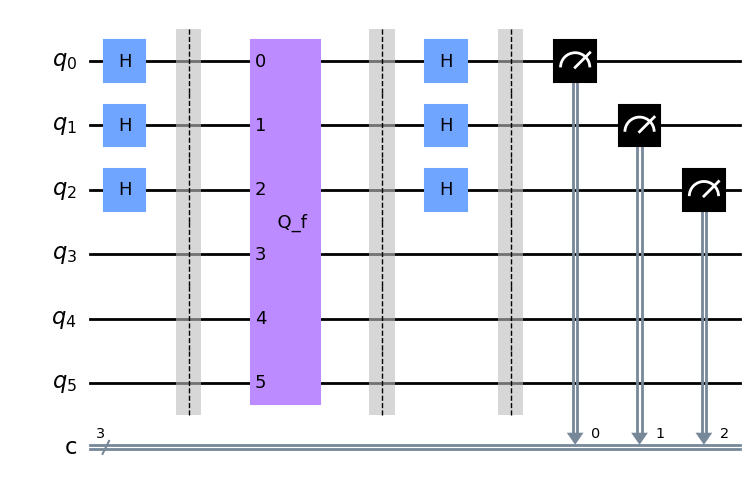

In [1]:
from qiskit import IBMQ, Aer, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

# Función que implementa el Algoritmo de Simon
def simon_algorithm(b):
    n = len(b)
    simon_circuit = QuantumCircuit(2*n,n)
    
    # HADAMARD GATES
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # SIMON ORACLE
    simon_circuit.append(simon_oracle(b).to_gate(label = '  Q_f  '),list(range(2*n)))
    # simon_circuit.compose(simon_oracle(b),inplace=True)
    simon_circuit.barrier()
    
    # HADAMARD GATES
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # MEASUREMENTS
    simon_circuit.measure(range(n), range(n))
    
    return simon_circuit

simon_algorithm('001').draw(output = 'mpl')    

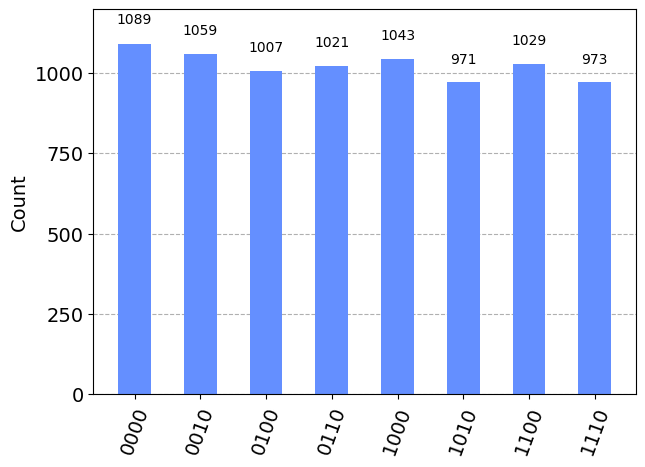

In [2]:
# INPUT
b = '0001'

# Simulación del Algoritmo de Simon con la cadena de bits b
aer_sim = Aer.get_backend('qasm_simulator')
algorithm = simon_algorithm(b)
results = aer_sim.run(transpile(algorithm, aer_sim), shots=8192).result()
counts = results.get_counts()
plot_histogram(counts)

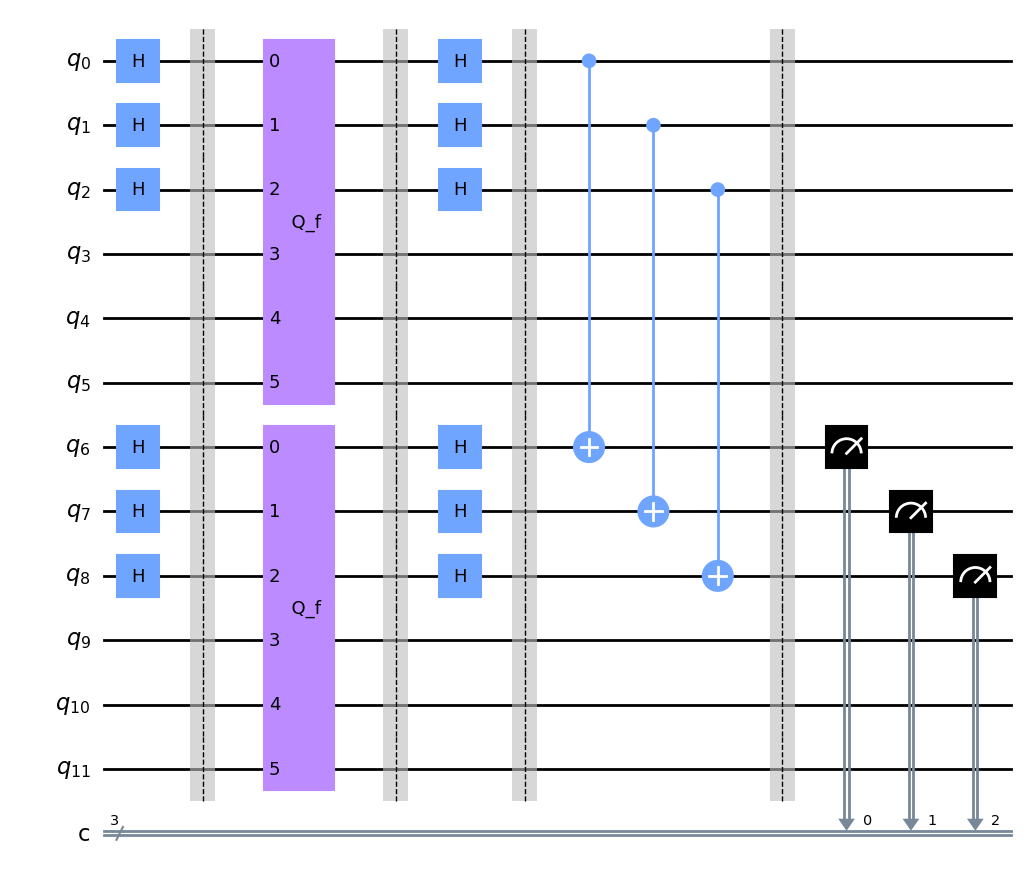

In [3]:

"""
Regla Metamórfica del algoritmo de Simon:

- Al efectuar la suma bit a bit con los posibles resultados del programa 
   que resuelve el algoritmo de Simon, obtenemos de nuevo el conjunto inicial.

"""

def simon_rule(b):
    n = len(b)
        
    simon_circuit = QuantumCircuit(4*n, n)

    # HADAMARD GATES
    simon_circuit.h(range(n))   
    simon_circuit.h(range(2*n, 3*n))
    simon_circuit.barrier()
    
    # SIMON ORACLE
    simon_circuit.append(simon_oracle(b).to_gate(label='  Q_f  '), list(range(2*n)))
    simon_circuit.append(simon_oracle(b).to_gate(label='  Q_f  '), list(range(2*n,4*n)))
    simon_circuit.barrier()
    
    # HADAMARD GATES
    simon_circuit.h(range(n))   
    simon_circuit.h(range(2*n, 3*n))
    simon_circuit.barrier()
    
    # BIT-WISE SUM
    for i in range(n):
        simon_circuit.cx(i, 2*n + i)
    simon_circuit.barrier()
    
    # MEASUREMENTS
    simon_circuit.measure(range(2*n,3*n), range(n))

    return simon_circuit

simon_rule('001').draw(output = 'mpl')   

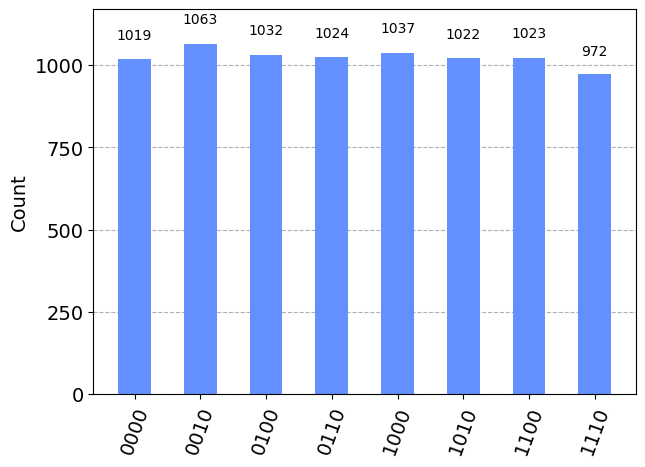

In [4]:
# INPUT
b = '0001'

# Simulación de la primera regla metamórfica con la cadena de bits b
aer_sim = Aer.get_backend('qasm_simulator')
algorithm = simon_rule(b)
results = aer_sim.run(transpile(algorithm, aer_sim), shots=8192).result()
counts = results.get_counts()
plot_histogram(counts)

In [5]:

"""
Regla metamórfica del algoritmo de Simon:
- Aplicar la implementación del algoritmo a una cadena e invertir las cadenas
   de bits resultantes, equivale a aplicar el programa a la cadena inicial invertida.

"""


def reverse_str(word: str) -> str:
    return word[::-1]

def reverse_lst(words: [str]) -> [str]:
    return list(map(reverse_str,words))

# INPUT
a = '0001'
b = reverse_str(a)

aer_sim = Aer.get_backend('qasm_simulator')
# INITIAL LOCAL SIMULATOR
algorithm = simon_algorithm(a)
results = aer_sim.run(transpile(algorithm,aer_sim)).result()
counts = results.get_counts()
print(sorted(set(counts.keys())))

# REVERSED LOCAL SIMULATOR
algorithm = simon_algorithm(b)
results = aer_sim.run(transpile(algorithm,aer_sim)).result()
counts = results.get_counts()
print(sorted(reverse_lst(set(counts.keys()))))

['0000', '0010', '0100', '0110', '1000', '1010', '1100', '1110']
['0000', '0010', '0100', '0110', '1000', '1010', '1100', '1110']


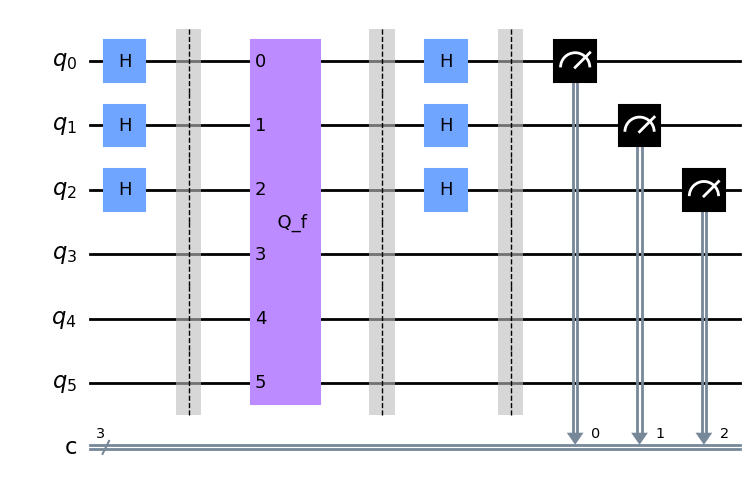

In [6]:
# Función que implementa el Algoritmo de Simon para la cadena invertida b
def simon_algorithm_inverted(b):
    b = reverse_str(b)
    n = len(b)
    simon_circuit = QuantumCircuit(2*n,n)
    
    # HADAMARD GATES
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # SIMON ORACLE
    simon_circuit.append(simon_oracle(b).to_gate(label = '  Q_f  '),list(range(2*n)))
    # simon_circuit.compose(simon_oracle(b),inplace=True)
    simon_circuit.barrier()
    
    # HADAMARD GATES
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # MEASUREMENTS
    simon_circuit.measure(range(n), range(n))
    
    return simon_circuit

simon_algorithm_inverted('001').draw(output = 'mpl')   

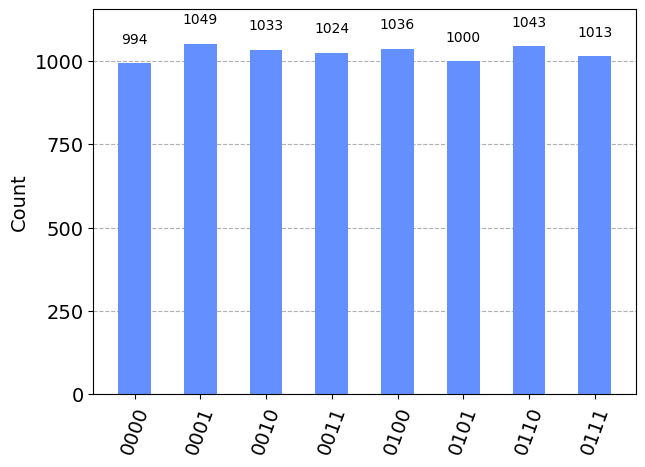

In [7]:
# INPUT
b = '0001'

# Simulación del Algoritmo de Simon con la cadena de bits b
aer_sim = Aer.get_backend('qasm_simulator')
algorithm = simon_algorithm_inverted(b)
results = aer_sim.run(transpile(algorithm, aer_sim), shots=8192).result()
counts = results.get_counts()
plot_histogram(counts)

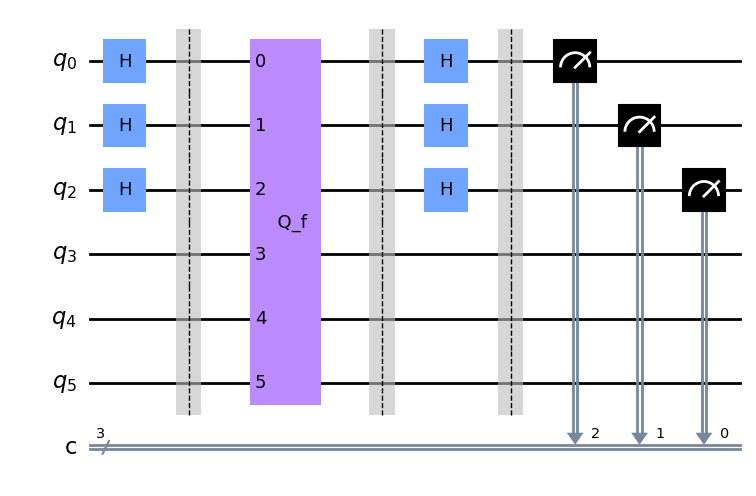

In [10]:
# Función para obtener los resultados inversos de los observados mediante el Algoritmo de Simon
def inverted_simon_algorithm(b):
    n = len(b)
    simon_circuit = QuantumCircuit(2*n,n)
    
    # HADAMARD GATES
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # SIMON ORACLE
    simon_circuit.append(simon_oracle(b).to_gate(label = '  Q_f  '),list(range(2*n)))
    # simon_circuit.compose(simon_oracle(b),inplace=True)
    simon_circuit.barrier()
    
    # HADAMARD GATES
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    # MEASUREMENTS
    simon_circuit.measure(range(n), range(n-1,-1,-1))
    
    return simon_circuit

simon_algorithm_inverted('001').draw(output = 'mpl') 

inverted_simon_algorithm('001').draw(output = 'mpl')  

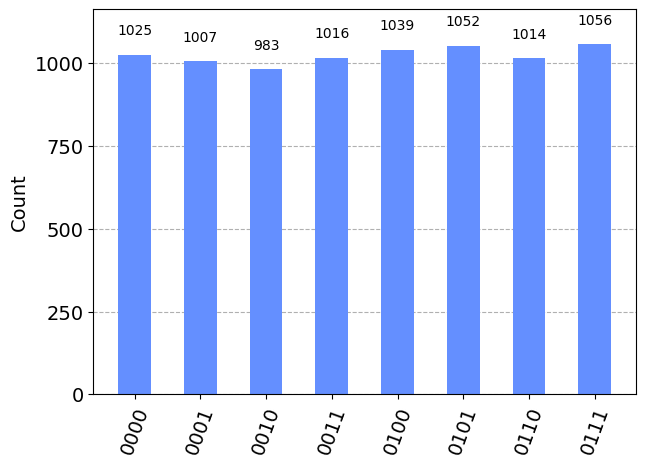

In [11]:
# INPUT
b = '0001'

# Simulación del Algoritmo de Simon con la cadena de bits b
aer_sim = Aer.get_backend('qasm_simulator')
algorithm = inverted_simon_algorithm(b)
results = aer_sim.run(transpile(algorithm, aer_sim), shots=8192).result()
counts = results.get_counts()
plot_histogram(counts)